In [1]:
!python3 -m pip install matplotlib
#import matplotlib
import matplotlib.pyplot as plt

import numpy as np
#import pandas as pd

#import watermark
!python3 -m pip install watermark
# import s3fs
import numpy as np
!pip install wheel
!python3 -m import pandas as pd
!python3 -m pip install seaborn as sns
#import seaborn as sns
import matplotlib.pyplot as plt
!python3 -m pip install sklearn
!python3 -m pip install verta
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from minio import Minio
from verta import Client
from minio.error import ResponseError
import os
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline

# import tools as tools
%matplotlib inline
%load_ext watermark

     |████████████████████████████████| 11.6 MB 17.5 MB/s eta 0:00:01    |████████▊                       | 3.2 MB 17.5 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 38.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 53.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 43.0 MB/s eta 0:00:01
You should consider upgrading via the '/opt/app-root/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.6 -m pip install --upgrade pip' command.
/opt/app-root/bin/python3: No module named import
     |████████████████████████████████| 283 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 41.6 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 40.1 MB/s eta 0:00:01     |██████████████▉                 | 12.0 MB 40.1 MB/s eta 0:00:01     |█████████

In [2]:
%watermark -n -v -m -g -iv


numpy 1.19.4
Thu Dec 17 2020 

CPython 3.6.8
IPython 7.16.1

compiler   : GCC 8.3.1 20191121 (Red Hat 8.3.1-5)
system     : Linux
release    : 4.18.0-147.8.1.el8_1.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
Git hash   : b904f3b820c3b19c8fc34c9e0f8bc2e36394c08b


In [3]:
def get_s3_server():
    minioClient = Minio('minio-ml-workshop:9000',
                    access_key='minio',
                    secret_key='minio123',
                    secure=False)

    return minioClient

In [4]:
!python3 -m pip install pandas as pd
import pandas as pd
minioClient = get_s3_server()
data_file = minioClient.fget_object("data", "full_data_csvRachna/part-00000-9cefbe43-2d8a-43b2-896c-70dc2034483c-c000.csv", "/tmp/data.csv")
data_file_version = data_file.version_id
data = pd.read_csv('/tmp/data.csv')
data.head(5)


  Created wheel for pd: filename=pd-0.0.1-py3-none-any.whl size=6506 sha256=3e5998e3813df72d8a11c3cc57c8b5cacca44238b154c9655e1f749f6a6fbfcb
  Stored in directory: /tmp/pip-ephem-wheel-cache-00e7gx32/wheels/a8/ce/4f/169c9ec9edbd0d04637602bb716fb543d16bb76c04a4e06296
Successfully built pd
You should consider upgrading via the '/opt/app-root/bin/python3 -m pip install --upgrade pip' command.


customerID PhoneService     MultipleLines InternetService  \
0         148          Yes                No             DSL   
1         463          Yes               Yes     Fiber optic   
2         471          Yes                No              No   
3         496           No  No phone service             DSL   
4         833          Yes                No             DSL   

        OnlineSecurity         OnlineBackup     DeviceProtection  \
0                   No                   No                   No   
1                   No                   No                  Yes   
2  No internet service  No internet service  No internet service   
3                   No                  Yes                  Yes   
4                  Yes                  Yes                  Yes   

           TechSupport          StreamingTV      StreamingMovies  ...  \
0                   No                   No                   No  ...   
1                   No                  Yes                  Yes  ...   
2  No internet service  No internet service  No internet service  ...   
3                   No                   No                  Yes  ...   
4                  Yes                   No                  Yes  ...   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0              Yes           Electronic check          45.65         45.65   
1               No           Electronic check         101.15        385.90   
2               No               Mailed check          20.65        330.60   
3              Yes  Bank transfer (automatic)          43.75        903.60   
4               No    Credit card (automatic)          74.10       5222.30   

   Churn  gender SeniorCitizen  Partner Dependents tenure  
0    Yes    Male             0       No         No      1  
1    Yes    Male             0      Yes        Yes      4  
2     No  Female             1       No         No     17  
3    Yes    Male             0       No         No     22  
4     No  Female             0      Yes        Yes     70  

[5 rows x 21 columns]

In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   PhoneService      7043 non-null   object 
 2   MultipleLines     7043 non-null   object 
 3   InternetService   7043 non-null   object 
 4   OnlineSecurity    7043 non-null   object 
 5   OnlineBackup      7043 non-null   object 
 6   DeviceProtection  7043 non-null   object 
 7   TechSupport       7043 non-null   object 
 8   StreamingTV       7043 non-null   object 
 9   StreamingMovies   7043 non-null   object 
 10  Contract          7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
 16  gender            7043 non-null   object 


In [7]:
data.describe()

customerID  MonthlyCharges  TotalCharges  SeniorCitizen       tenure
count  7043.000000     7043.000000   7032.000000    7043.000000  7043.000000
mean   3522.000000       64.761692   2283.300441       0.162147    32.371149
std    2033.283305       30.090047   2266.771362       0.368612    24.559481
min       1.000000       18.250000     18.800000       0.000000     0.000000
25%    1761.500000       35.500000    401.450000       0.000000     9.000000
50%    3522.000000       70.350000   1397.475000       0.000000    29.000000
75%    5282.500000       89.850000   3794.737500       0.000000    55.000000
max    7043.000000      118.750000   8684.800000       1.000000    72.000000

In [8]:
data.isnull().sum()

customerID           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
dtype: int64

You should consider upgrading via the '/opt/app-root/bin/python3 -m pip install --upgrade pip' command.


Text(0, 0.5, 'Count')

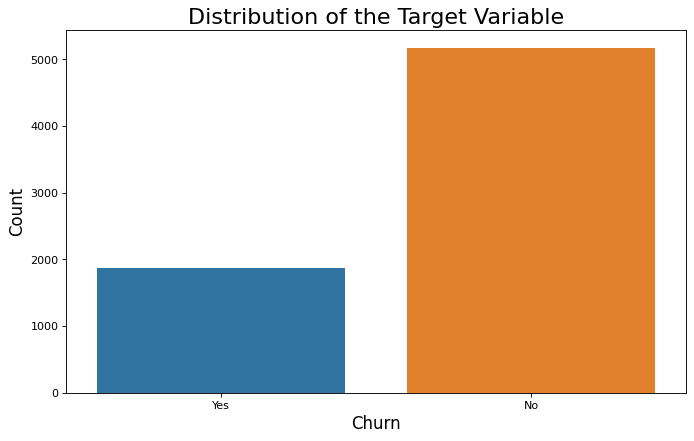

In [9]:
!python3 -m pip install seaborn as sns
import seaborn as sns
fig = plt.figure(figsize=(10,6), dpi=80)
ax = sns.countplot(x="Churn", data=data)
ax.set_title('Distribution of the Target Variable', fontsize=20)
ax.set_xlabel('Churn', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)

In [10]:
# Convert binary variable into numeric so plotting is easier. We need to later take mean
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

Text(0.5, 1.0, 'Churn count by Contract')

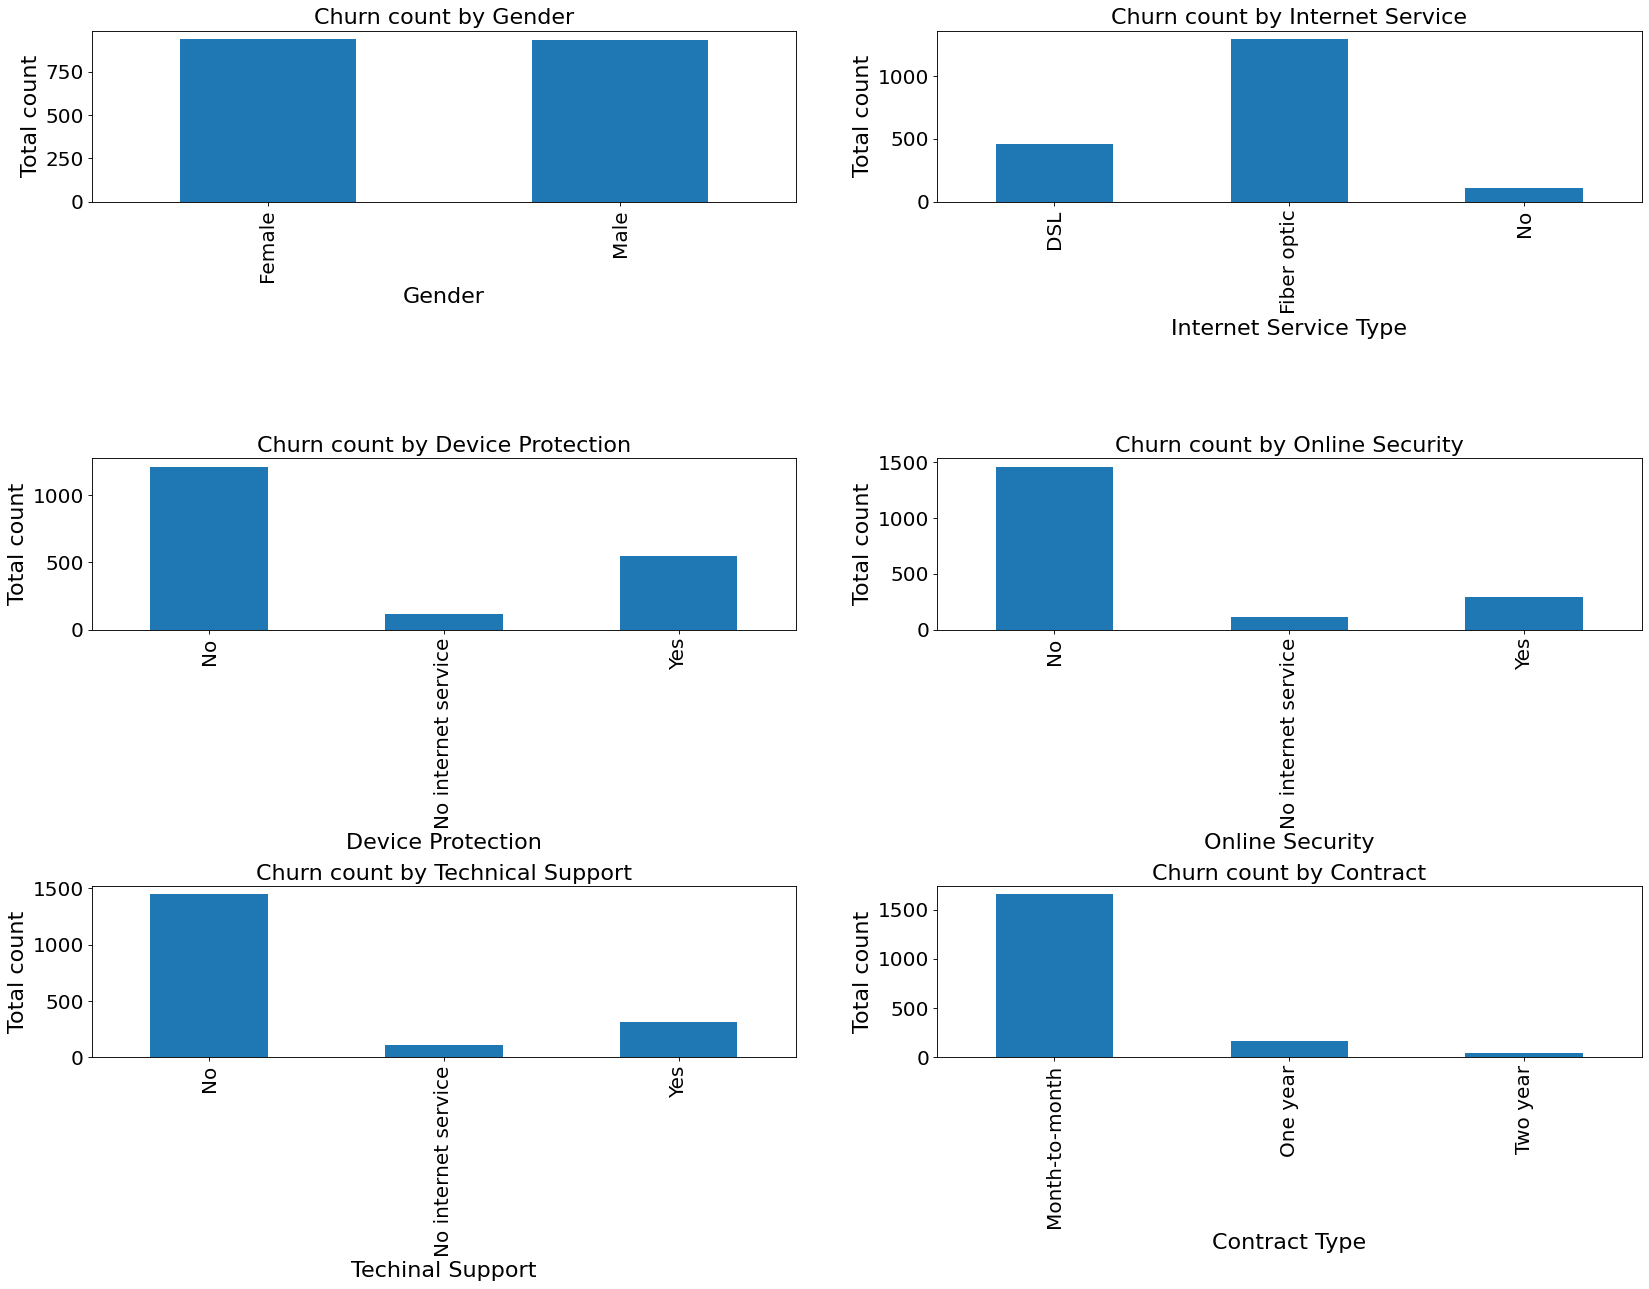

In [11]:
fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(25,17), dpi = 80)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None ,wspace=None, hspace=1.5)
plt.rc('xtick', labelsize = 12)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 12)

data.groupby('gender').Churn.sum().plot(kind='bar', ax = ax1)
ax1.set_ylabel('Total count',fontsize = 20)
ax1.set_xlabel('Gender',fontsize = 20)
ax1.tick_params(labelsize = 18)
ax1.set_title('Churn count by Gender',fontsize = 20)

data.groupby('InternetService').Churn.sum().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Total count',fontsize = 20)
ax2.set_xlabel('Internet Service Type',fontsize = 20)
ax2.tick_params(labelsize = 18)
ax2.set_title('Churn count by Internet Service',fontsize = 20)

data.groupby('DeviceProtection').Churn.sum().plot(kind='bar', ax=ax3)
ax3.set_ylabel('Total count',fontsize = 20)
ax3.set_xlabel('Device Protection',fontsize = 20)
ax3.tick_params(labelsize = 18)
ax3.set_title('Churn count by Device Protection',fontsize = 20)

data.groupby('OnlineSecurity').Churn.sum().plot(kind='bar', ax=ax4)
ax4.set_ylabel('Total count',fontsize = 20)
ax4.set_xlabel('Online Security',fontsize = 20)
ax4.tick_params(labelsize = 18)
ax4.set_title('Churn count by Online Security',fontsize = 20)

data.groupby('TechSupport').Churn.sum().plot(kind='bar',ax=ax5)
ax5.set_ylabel('Total count',fontsize = 20)
ax5.set_xlabel('Techinal Support',fontsize = 20)
ax5.tick_params(labelsize = 18)
ax5.set_title('Churn count by Technical Support',fontsize = 20)

data.groupby('Contract').Churn.sum().plot(kind='bar',ax=ax6)
ax6.set_ylabel('Total count',fontsize = 20)
ax6.set_xlabel('Contract Type',fontsize = 20)
ax6.tick_params(labelsize = 18)
ax6.set_title('Churn count by Contract',fontsize = 20)


In [12]:
data.replace(" ", np.nan, inplace=True)

In [13]:
data.isna().sum()

customerID           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
dtype: int64

In [14]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [15]:
mean = data['TotalCharges'].mean()
data.fillna(mean, inplace=True)
# Now we know that total charges has nan values
data.isna().sum()

customerID          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
dtype: int64

Text(9.942158564814818, 0.5, 'Total Charges')

<Figure size 800x640 with 0 Axes>

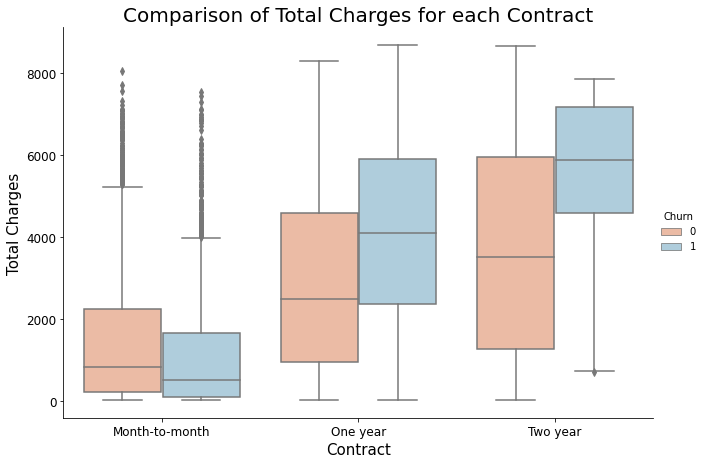

In [16]:
plt.figure(figsize=(10,8), dpi=80)
# Sns.set(rc={'figure.figsize':(25,15)})
ax = sns.catplot(x="Contract", y="TotalCharges", hue="Churn", kind="box", data=data, height = 6,aspect = 1.5,palette = 'RdBu')
plt.title('Comparison of Total Charges for each Contract',fontsize = 20)
plt.xlabel('Contract',fontsize = 15)
plt.ylabel('Total Charges',fontsize = 15)